In [22]:
from sympy import *
from misc import to_single_sine

<img src="res/filter_simple.jpg" width="400">

In [23]:
A,L,C,R,f,t = symbols('A,L,C,R,f,t', positive = True)
q = Function('q')(t)
q_ = Derivative(q, t)
q__ = Derivative(q_, t)
args = [
    (A, 4),
    (L, 1e-3),
    (C, 1e-6),
    (R, 120),
    (f, 10e3)
]
args_no_L = list(filter(lambda x : x[0] != L, args))
L_min = 0
L_max = 2e-3

In [24]:
U_s = A*sin(2*pi*f*t)
eq = q/C + q_*R + q__*L - U_s
q_sol = dsolve(eq).rhs
to_erase = q_sol.free_symbols
to_erase.difference_update({A,L,C,R,f,t})
for s in to_erase:
    q_sol = q_sol.subs(s, 0)
q_ss = to_single_sine(q_sol)
assert((q_ss['func'] - q_sol).simplify() == 0)
U_f = U_s - L * q_ss['func'].diff(t,2) - q_ss['func']/C
U_f_ss = to_single_sine(U_f)
assert((U_f_ss['func'] - U_f).simplify() == 0)

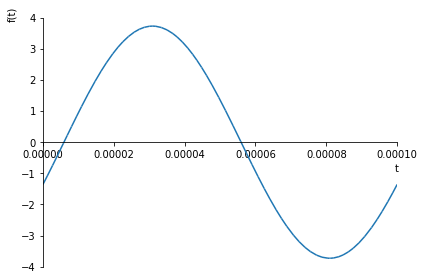

In [25]:
plot(U_f_ss['func'].subs(args), (t,0,1e-4))

## Phase:

In [26]:
U_f_ss['phase']

-atan((2*pi*L*f - 1/(2*pi*C*f))/R)

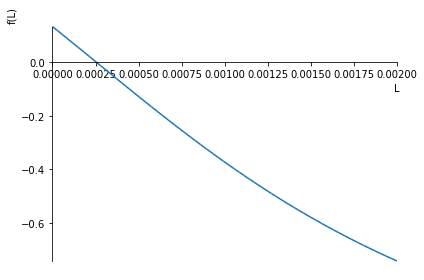

In [27]:
plot(U_f_ss['phase'].subs(args_no_L), (L, L_min, L_max))